In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
import random

In [2]:
dfdata = pd.read_csv('Brand_mobil_20102017.csv', parse_dates = ['Periode'], index_col = 'Periode')

In [3]:
dfdata.tail()

,Toyota,Daihatsu,Honda,Mitsubishi,Suzuki,Others,Total
Periode,,,,,,,
2017-09-01,27297.0,15507.0,15112.0,10934.0,9126.0,9720.0,87696.0
2017-10-01,30114.0,16760.0,17023.0,11831.0,9594.0,9111.0,94433.0
2017-11-01,28855.0,16360.0,15811.0,15291.0,11007.0,8867.0,96191.0
2017-12-01,23724.0,13028.0,15285.0,12775.0,10008.0,10278.0,85098.0
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dfdata.isna().tail()

,Toyota,Daihatsu,Honda,Mitsubishi,Suzuki,Others,Total
Periode,,,,,,,
2017-09-01,False,False,False,False,False,False,False
2017-10-01,False,False,False,False,False,False,False
2017-11-01,False,False,False,False,False,False,False
2017-12-01,False,False,False,False,False,False,False
NaT,True,True,True,True,True,True,True


In [5]:
dfdata.dropna(inplace = True)

In [6]:
dfdata.head()

,Toyota,Daihatsu,Honda,Mitsubishi,Suzuki,Others,Total
Periode,,,,,,,
2010-01-01,20803.0,8302.0,3755.0,6855.0,4815.0,8301.0,52831.0
2010-02-01,21800.0,7518.0,4431.0,8246.0,4638.0,9055.0,55688.0
2010-03-01,26287.0,8084.0,5179.0,9068.0,6203.0,10734.0,65555.0
2010-04-01,24422.0,9298.0,5154.0,9560.0,6013.0,10785.0,65232.0
2010-05-01,21050.0,9485.0,4439.0,9544.0,6043.0,9959.0,60520.0


In [7]:
dfdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2010-01-01 to 2017-12-01
Data columns (total 7 columns):
Toyota        96 non-null float64
Daihatsu      96 non-null float64
Honda         96 non-null float64
Mitsubishi    96 non-null float64
Suzuki        96 non-null float64
Others        96 non-null float64
Total         96 non-null float64
dtypes: float64(7)
memory usage: 6.0 KB


In [8]:
print('The data Time range from {} to {}'.format(dfdata.index.min(),dfdata.index.max()))

The data Time range from 2010-01-01 00:00:00 to 2017-12-01 00:00:00


## Data Preprocessing

In [9]:
tdata = dfdata[['Toyota','Daihatsu','Honda','Mitsubishi','Suzuki','Others']].resample('MS').mean()
tdata.head()

,Toyota,Daihatsu,Honda,Mitsubishi,Suzuki,Others
Periode,,,,,,
2010-01-01,20803.0,8302.0,3755.0,6855.0,4815.0,8301.0
2010-02-01,21800.0,7518.0,4431.0,8246.0,4638.0,9055.0
2010-03-01,26287.0,8084.0,5179.0,9068.0,6203.0,10734.0
2010-04-01,24422.0,9298.0,5154.0,9560.0,6013.0,10785.0
2010-05-01,21050.0,9485.0,4439.0,9544.0,6043.0,9959.0


In [10]:
td = dfdata['Mitsubishi'].resample('MS').mean()

C:\Users\GILANG\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


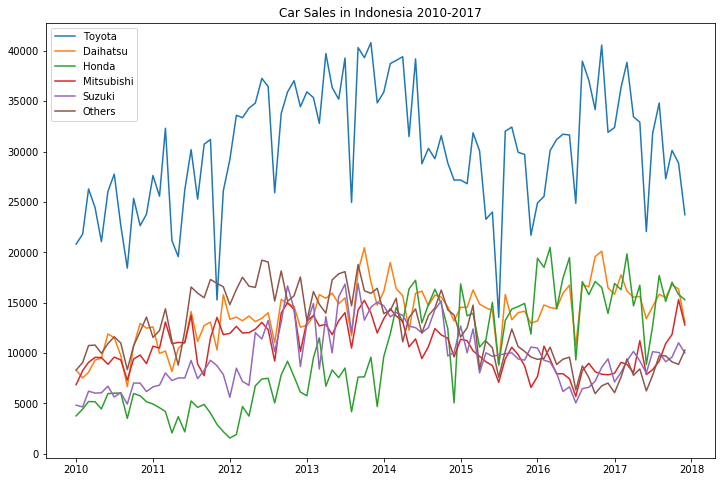

In [11]:
plt.figure(figsize = (12,8))
plt.title('Car Sales in Indonesia 2010-2017')

plt.plot(tdata['Toyota'], label = 'Toyota')
plt.plot(tdata['Daihatsu'], label = 'Daihatsu')
plt.plot(tdata['Honda'], label = 'Honda')
plt.plot(tdata['Mitsubishi'], label = 'Mitsubishi')
plt.plot(tdata['Suzuki'], label = 'Suzuki')
plt.plot(tdata['Others'], label = 'Others')
plt.legend()
plt.show()

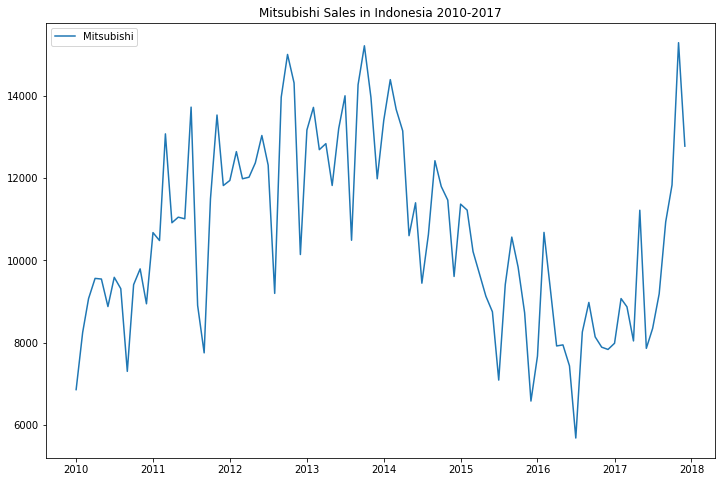

In [12]:
plt.figure(figsize = (12,8))
plt.title('Mitsubishi Sales in Indonesia 2010-2017')
plt.plot(tdata['Mitsubishi'], label = 'Mitsubishi')
plt.legend()
plt.show()

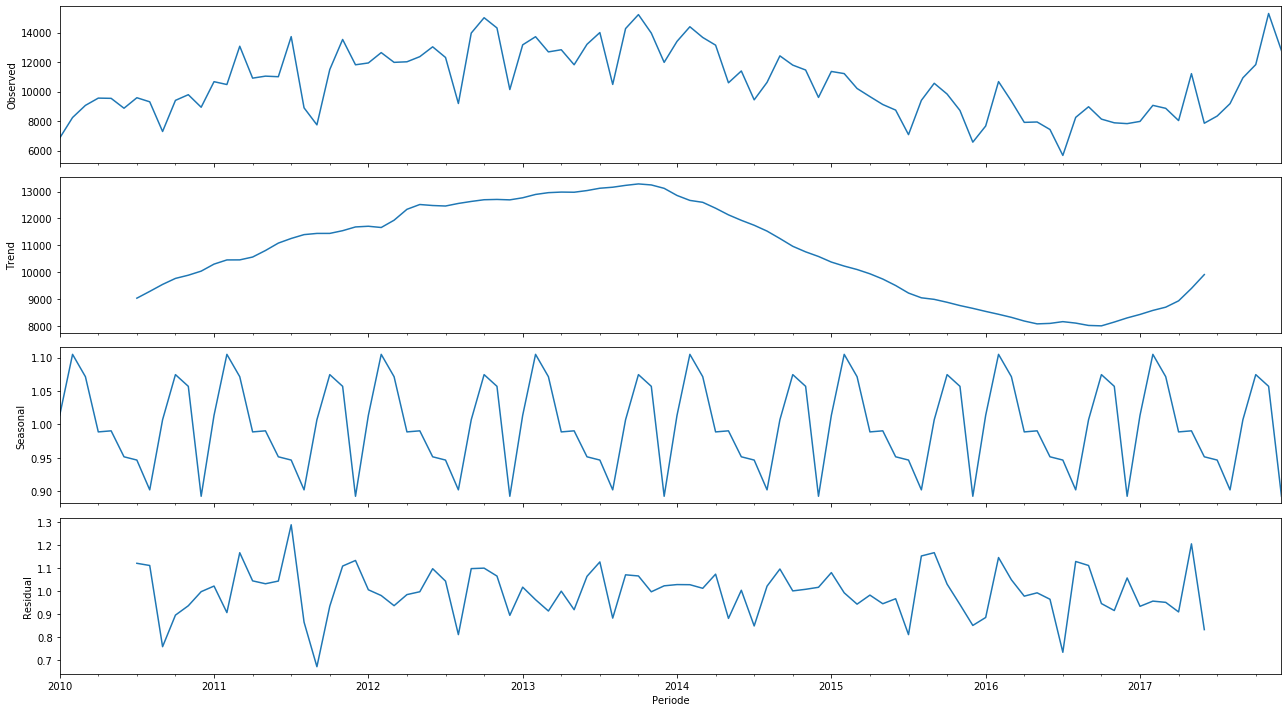

In [13]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 10
decomposition = sm.tsa.seasonal_decompose(td, model='multipicative')
fig = decomposition.plot()
plt.show()

In [14]:
decomposition.seasonal.head(10)

Periode
2010-01-01    1.013567
2010-02-01    1.104782
2010-03-01    1.071347
2010-04-01    0.988772
2010-05-01    0.990367
2010-06-01    0.951546
2010-07-01    0.946658
2010-08-01    0.902100
2010-09-01    1.006977
2010-10-01    1.074455
Freq: MS, Name: Mitsubishi, dtype: float64

In [15]:
decomposition.resid.head(10)

Periode
2010-01-01         NaN
2010-02-01         NaN
2010-03-01         NaN
2010-04-01         NaN
2010-05-01         NaN
2010-06-01         NaN
2010-07-01    1.121059
2010-08-01    1.111529
2010-09-01    0.759409
2010-10-01    0.896297
Freq: MS, Name: Mitsubishi, dtype: float64

Made per DataFrame

In [16]:
dftoyota = dfdata['Toyota']
dftoyota.head()

dfdaihatsu = dfdata['Daihatsu']
dfdaihatsu.head()

dfhonda = dfdata['Honda']
dfhonda.head()

dfmitsubishi = dfdata['Mitsubishi']
dfmitsubishi.head()

dfsuzuki = dfdata['Suzuki']
dfsuzuki.head()

dfothers = dfdata['Others']
dfothers.head()

dftoyota.head()
dfdaihatsu.head()
dfhonda.head()
dfmitsubishi.head()
dfsuzuki.head()
dfothers.head()

Periode
2010-01-01     8301.0
2010-02-01     9055.0
2010-03-01    10734.0
2010-04-01    10785.0
2010-05-01     9959.0
Name: Others, dtype: float64

Dickey-Fuller Test

In [17]:
from statsmodels.tsa.stattools import adfuller

In [18]:
dfcar_brand = [dftoyota,dfdaihatsu,dfhonda,dfmitsubishi,dfsuzuki,dfothers]
dfname = ['Toyota :', 'Daihatsu :','Honda :','Mitsubishi :', 'Suzuki :','Others :']

In [19]:
for index, i in enumerate(dfcar_brand):
    result = adfuller(i)
    print(dfname[index])
    print('ADF Statistic:{}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    
    #all data non statisioner, need diferensiation ( danta > o,o5 )

Toyota :
ADF Statistic:-2.7038963342563753
p-value: 0.07336645650211786
Daihatsu :
ADF Statistic:-2.5512394982040516
p-value: 0.10349954448917553
Honda :
ADF Statistic:-0.7472288279341994
p-value: 0.8341341321905049
Mitsubishi :
ADF Statistic:-1.799449654505583
p-value: 0.3807349590833119
Suzuki :
ADF Statistic:-1.9043213510014503
p-value: 0.3300309496726761
Others :
ADF Statistic:-1.1290154724704395
p-value: 0.7033632852005766


## Differencing

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

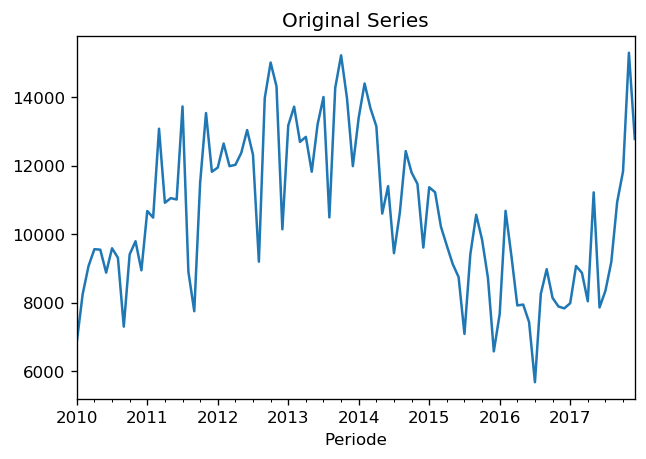

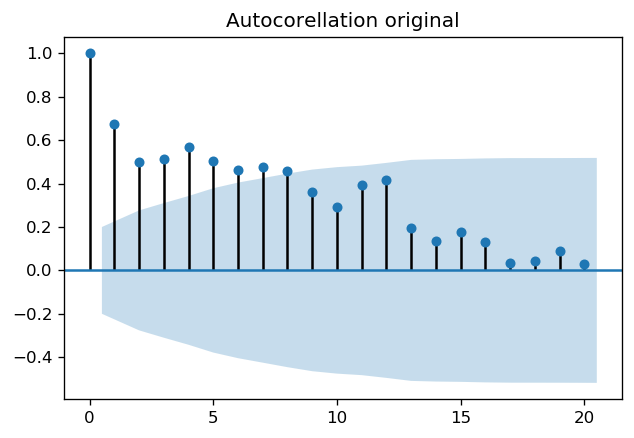

In [21]:
plt.rcParams.update({'figure.figsize':(6,4), 'figure.dpi':120})

# Original Series
ori = dfmitsubishi.plot()
ori.set_title('Original Series')
plot_acf(dfmitsubishi, title = 'Autocorellation original')

plt.show()

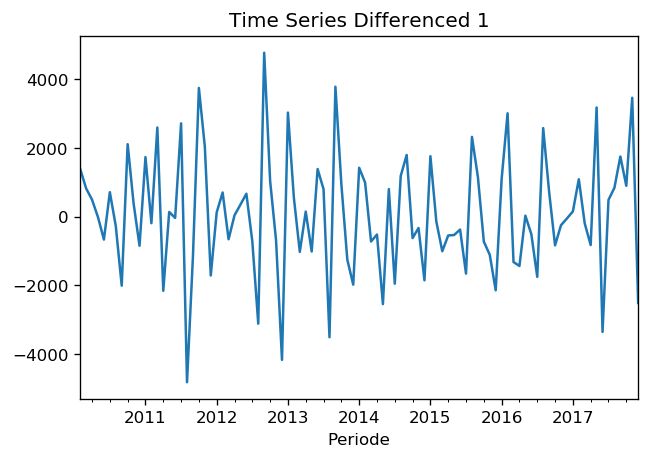

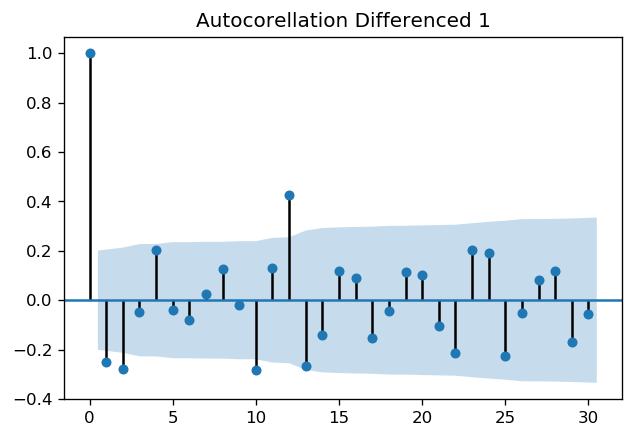

ADF Statistic:-1.3702450972387794
p-value: 0.5964549733910897


In [22]:
# Differencing 1
diff1 = dfmitsubishi.diff().dropna().plot()
diff1.set_title('Time Series Differenced 1')
plot_acf(dfmitsubishi.diff().dropna(),lags =30,  title = 'Autocorellation Differenced 1')
plt.show()

#Dif  1
result = adfuller(dfmitsubishi.diff().dropna())
print('ADF Statistic:{}'.format(result[0]))
print('p-value: {}'.format(result[1]))

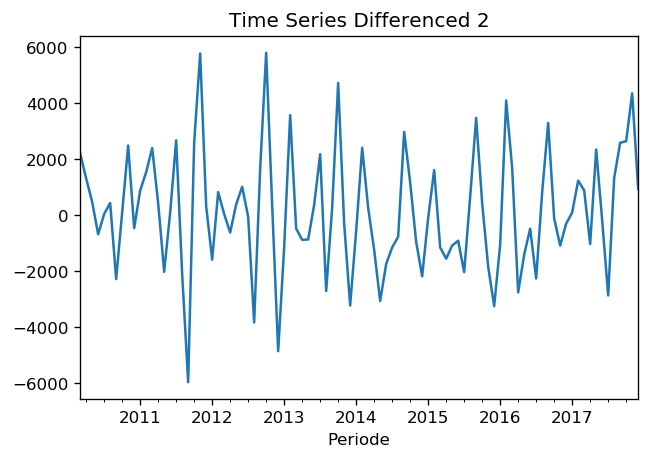

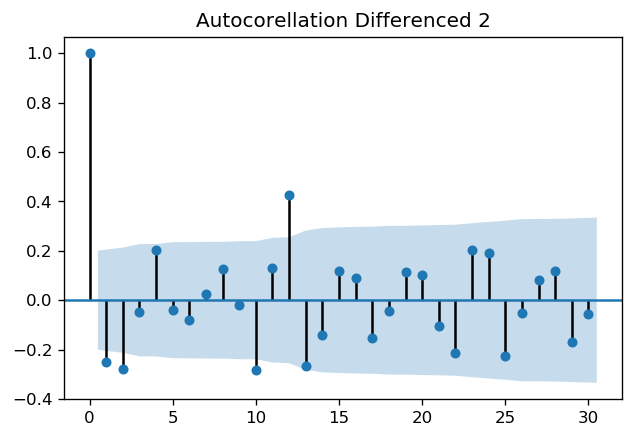

ADF Statistic:-1.2996938636591693
p-value: 0.6293123597887519


In [23]:
# Differencing 
diff13 = dfmitsubishi.diff(2).dropna().plot()
diff13.set_title('Time Series Differenced 2')
plot_acf(dfmitsubishi.diff().dropna(),lags =30,  title = 'Autocorellation Differenced 2')
plt.show()

#Dif 2
result = adfuller(dfmitsubishi.diff(2).dropna())
print('ADF Statistic:{}'.format(result[0]))
print('p-value: {}'.format(result[1]))

In [24]:
print('Original S')
result = adfuller(dfmitsubishi.dropna())
print('ADF Statistic:{}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('\n')

#Dif 1
print('Dif 1')
result = adfuller(dfmitsubishi.diff().dropna())
print('ADF Statistic:{}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('\n')

#Dif 2
print('Dif 2')
result = adfuller(dfmitsubishi.diff(2).dropna())
print('ADF Statistic:{}'.format(result[0]))
print('p-value: {}'.format(result[1]))


Original S
ADF Statistic:-1.799449654505583
p-value: 0.3807349590833119


Dif 1
ADF Statistic:-1.3702450972387794
p-value: 0.5964549733910897


Dif 2
ADF Statistic:-1.2996938636591693
p-value: 0.6293123597887519


Data yang akan di gunakan ada lah ada awal, karena setelah di dif maka semakin tinggi p-value.

In [25]:
M_difference_0 = dfmitsubishi.dropna()

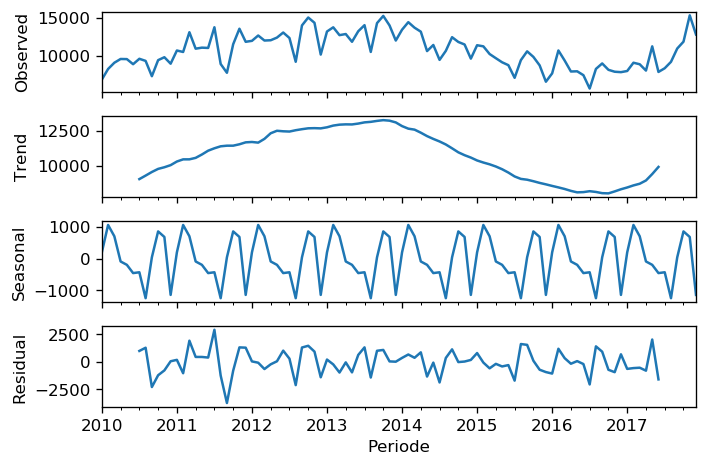

In [26]:
#yang akan digunakanadalah model Additive karena plot terlihat seperti mengikuti addition model
M_decomposition_difference_0 = sm.tsa.seasonal_decompose(M_difference_0, model='additive') 
fig = M_decomposition_difference_0.plot()
plt.show()

In [27]:
M_deseason = M_difference_0/ M_decomposition_difference_0.seasonal

In [28]:
M_decomposition_difference_0.seasonal.tail()

Periode
2017-08-01   -1247.380952
2017-09-01      43.053571
2017-10-01     860.154762
2017-11-01     685.107143
2017-12-01   -1143.803571
Name: Mitsubishi, dtype: float64

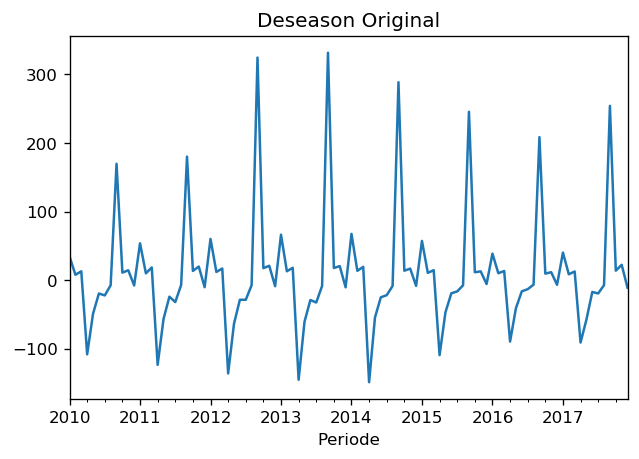

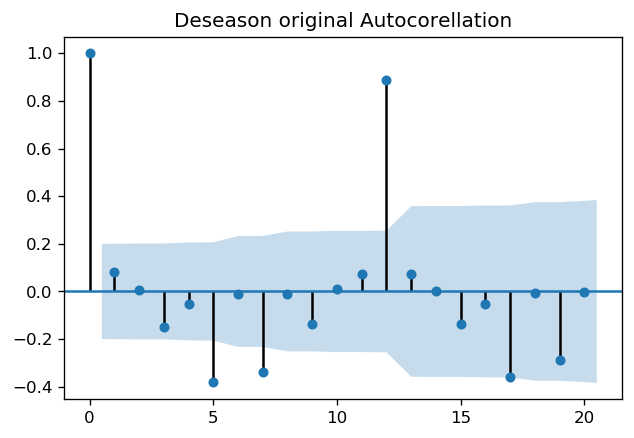

In [29]:
#Deseason original
M_ori_deseason = M_deseason.plot()
M_ori_deseason.set_title('Deseason Original')
plot_acf(M_deseason, title = 'Deseason original Autocorellation')

plt.show()

In [30]:
result = adfuller(M_deseason)
print('ADF Statistic:{}'.format(result[0]))
print('p-value: {}'.format(result[1]))

ADF Statistic:-1.8970704179017444
p-value: 0.3334405312359531


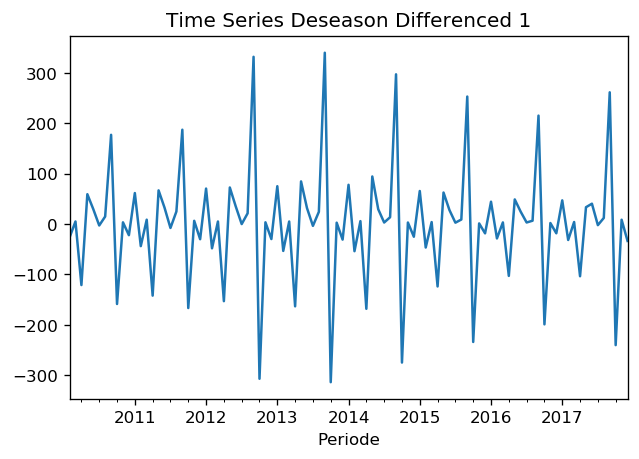

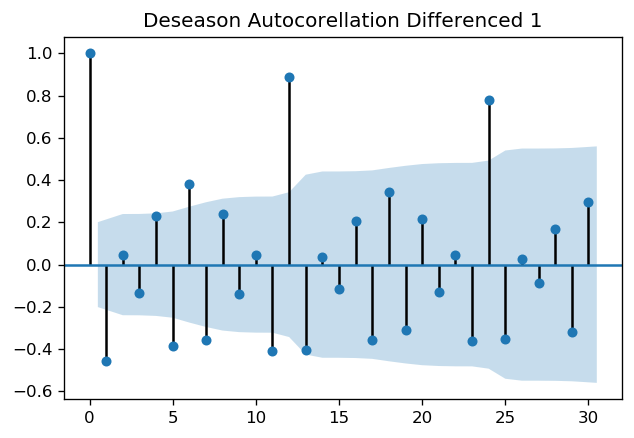

In [31]:
# 1st Differencing
diff1_deseason = M_deseason.diff().dropna().plot()
diff1_deseason.set_title('Time Series Deseason Differenced 1')
plot_acf(M_deseason.diff().dropna(),lags = 30, title = 'Deseason Autocorellation Differenced 1')

plt.show()

In [32]:
result = adfuller(M_deseason.diff().dropna())
print('ADF Statistic:{}'.format(result[0]))
print('p-value: {}'.format(result[1]))

ADF Statistic:-41.03126031305431
p-value: 0.0


C:\Users\GILANG\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


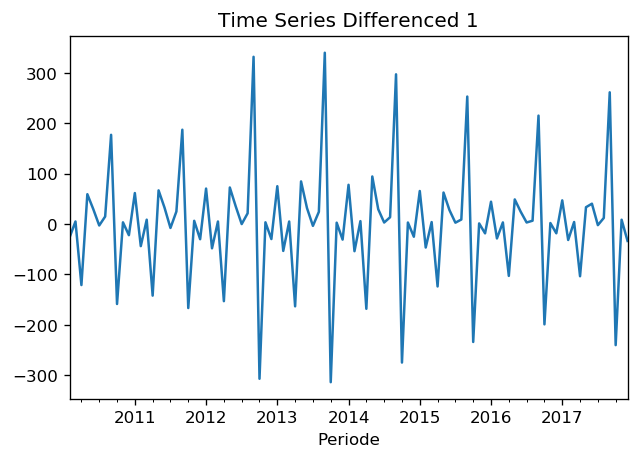

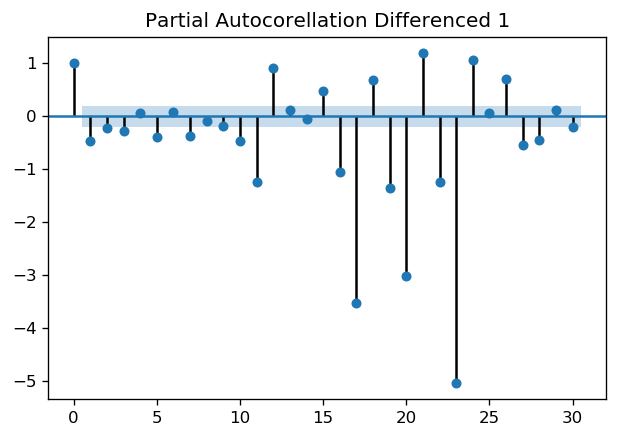

In [33]:
#PACF
diff1 = M_deseason.diff().dropna().plot()
diff1.set_title('Time Series Differenced 1')
plot_pacf(M_deseason.diff().dropna(), lags = 30, title = 'Partial Autocorellation Differenced 1')

plt.show()

## ARIMA

In [34]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(M_deseason,order =(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.Mitsubishi   No. Observations:                   95
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -559.391
Method:                       css-mle   S.D. of innovations             85.312
Date:                Wed, 20 Nov 2019   AIC                           1126.782
Time:                        07:06:22   BIC                           1136.998
Sample:                    02-01-2010   HQIC                          1130.910
                         - 12-01-2017                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1546      0.345      0.449      0.655      -0.521       0.830
ar.L1.D.Mitsubishi     0.0908      0.103      0.886      0.378      -0.110       0.292
ma.L1.D.Mitsubishi  

C:\Users\GILANG\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GILANG\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


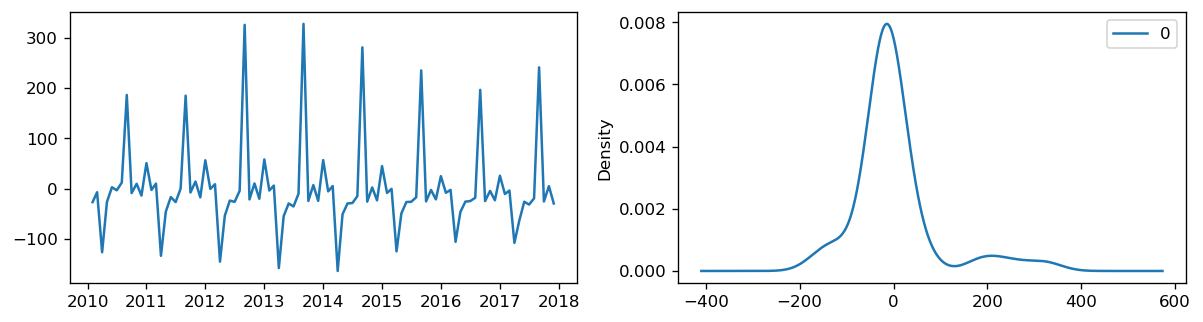

In [35]:
plt.rcParams.update({'figure.figsize':(12,3), 'figure.dpi':120})
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
ax[0].plot(residuals.index, residuals.values)
residuals.plot.kde( ax=ax[1])


plt.show()

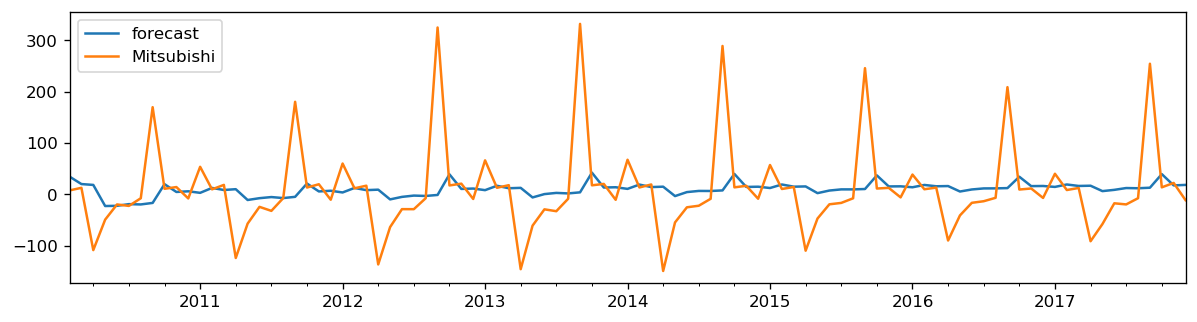

In [36]:
model_fit.plot_predict(dynamic=False)
plt.show()

Validation

C:\Users\GILANG\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\GILANG\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


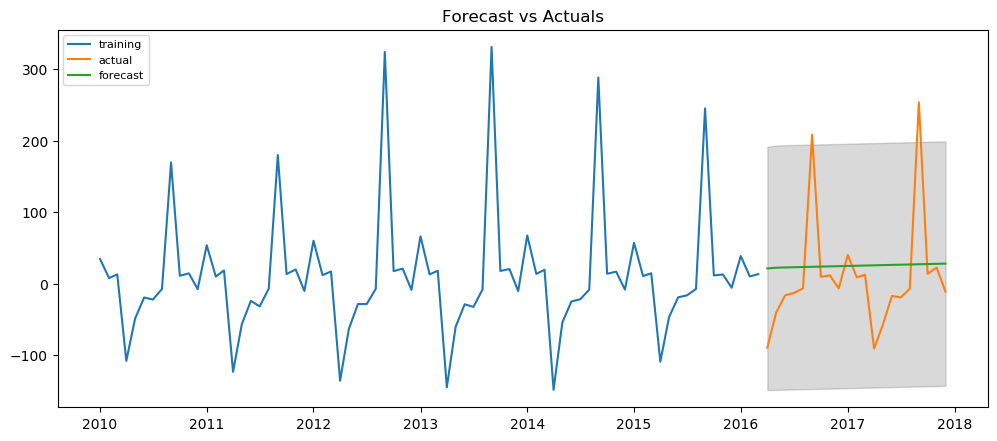

In [37]:
train = M_deseason[:75]
test = M_deseason[75:]
n_periods = 24

model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast (resulted in forecast, standard error, and confidence interval)
fc, se, conf = fitted.forecast(21, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [38]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    
    mins = np.amin(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
  
    return({'mape':mape,'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test)

{'mape': 1.9842305562262317,
 'corr': 0.1994092014807088,
 'minmax': 1.5674872014000463}

In [39]:
#Auto pd.arima
import pmdarima as pm

model = pm.auto_arima(M_deseason, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series (1 as monthly)
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

C:\Users\GILANG\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\GILANG\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Fit ARIMA: order=(1, 0, 1); AIC=1133.328, BIC=1143.585, Fit time=0.130 seconds
Fit ARIMA: order=(0, 0, 0); AIC=1129.988, BIC=1135.117, Fit time=0.004 seconds
Fit ARIMA: order=(1, 0, 0); AIC=1131.328, BIC=1139.021, Fit time=0.049 seconds
Fit ARIMA: order=(0, 0, 1); AIC=1131.348, BIC=1139.041, Fit time=0.015 seconds
Total fit time: 0.201 seconds
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   96
Model:                     ARMA(0, 0)   Log Likelihood                -562.994
Method:                           css   S.D. of innovations             85.250
Date:                Wed, 20 Nov 2019   AIC                           1129.988
Time:                        07:06:24   BIC                           1135.117
Sample:                             0   HQIC                          1132.062
                                                                              
                 coef 

## SARIMA (Seasonal ARIMA)

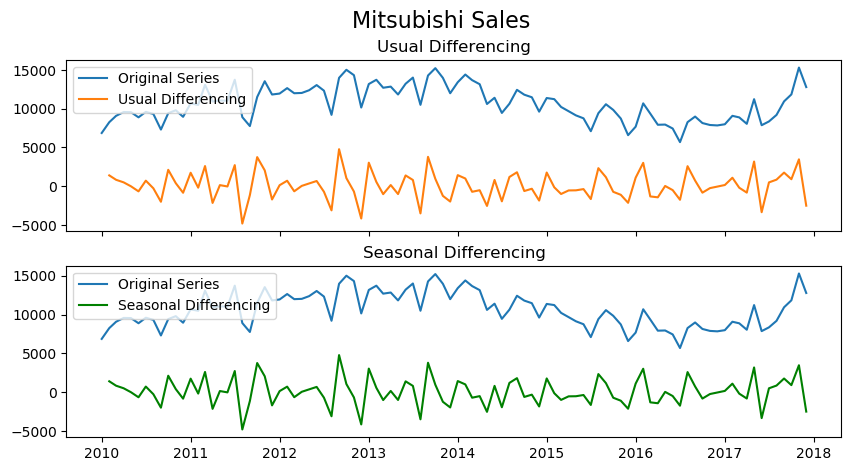

In [40]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(dfmitsubishi, label='Original Series')
axes[0].plot(dfmitsubishi.diff(), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)

# Seasonal Differencing
axes[1].plot(dfmitsubishi, label='Original Series')
axes[1].plot(dfmitsubishi.diff(), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Mitsubishi Sales', fontsize=16)
plt.show()

In [41]:
import pmdarima as pm
model = pm.auto_arima(dfmitsubishi, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=12,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # with Seasonality
                      start_P=0, 
                      start_Q = 0, 
                      D=1,            #Determine the Seasonal Difference as 1
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1487.063, BIC=1491.901, Fit time=0.020 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1480.276, BIC=1489.952, Fit time=0.175 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1470.979, BIC=1480.655, Fit time=0.416 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1466.085, BIC=1478.179, Fit time=1.172 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=1472.322, BIC=1481.997, Fit time=0.382 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1468.631, BIC=1483.144, Fit time=2.803 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1473.275, BIC=1480.532, Fit time=0.111 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=1471.334, BIC=1488.265, Fit time=4.403 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1467.023, BIC=1481.536, Fit time=1.771 seconds
Fit ARIMA: order=(0, 1, 0) s

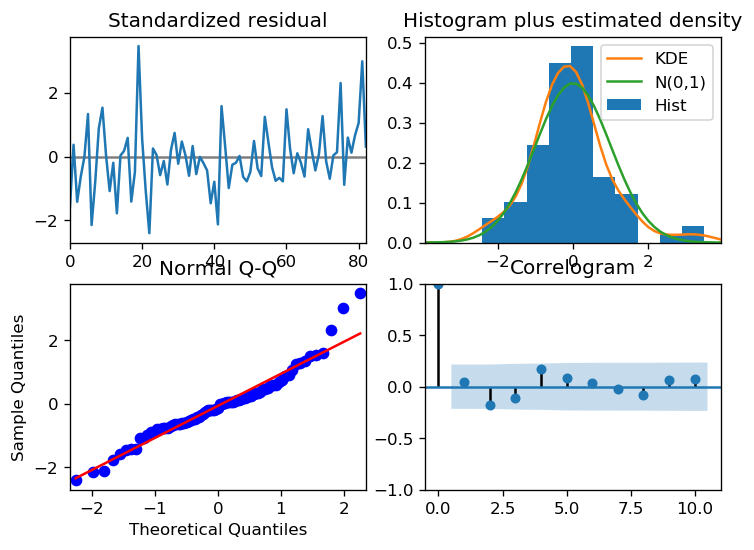

In [42]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

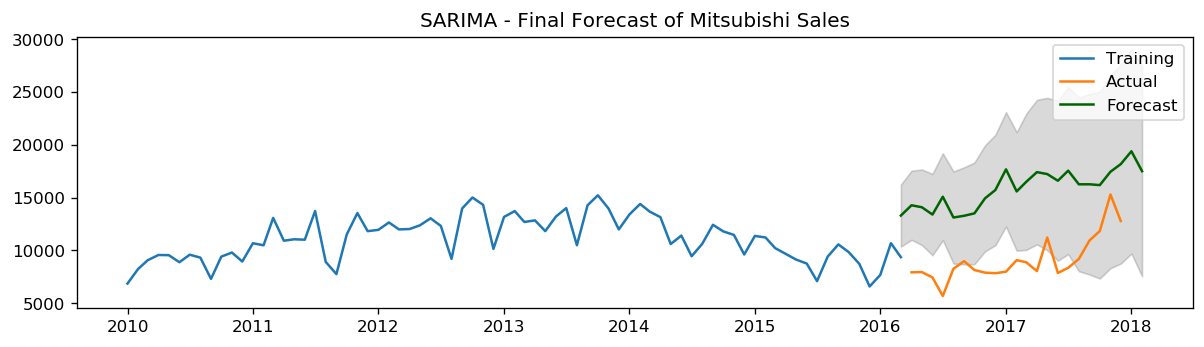

In [43]:
n_periods = 24
train = dfmitsubishi[:75]
test = dfmitsubishi[75:]

fitted, confint = model.predict(n_periods=n_periods, return_conf_int=True) #Return the Confidence Interval
index_of_fc = pd.date_range(train.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(train, label ='Training')
plt.plot(test, label = 'Actual')
plt.plot(fitted_series, color='darkgreen', label ='Forecast')
plt.legend()
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of Mitsubishi Sales")
plt.show()

In [44]:
forecast_accuracy(fc, test)

{'mape': 0.9971673394612718,
 'corr': 0.725235666931826,
 'minmax': 0.9971673394612719}

## SARIMAX

In [45]:
result_mul = sm.tsa.seasonal_decompose(dfmitsubishi[-24:],   # 24 last months
                                model='multiplicative', 
                                extrapolate_trend='freq')

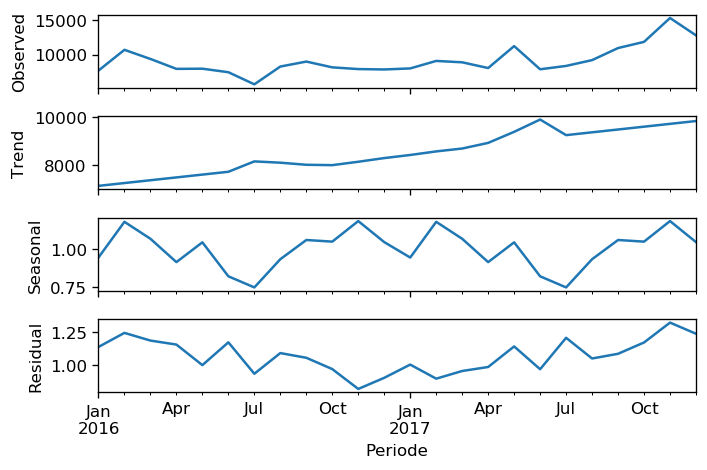

In [46]:
plt.rcParams.update({'figure.figsize':(6,4), 'figure.dpi':120})
fig = result_mul.plot()
plt.show()

In [47]:
seasonal_index = result_mul.seasonal[-12:].to_frame()
seasonal_index['month'] = pd.to_datetime(seasonal_index.index).month

In [48]:
dfmitsubishi = pd.DataFrame(dfmitsubishi)
dfmitsubishi['month'] = dfmitsubishi.index.month
dfM = pd.merge(dfmitsubishi, seasonal_index, how='left', on='month')
dfM.columns = ['Mitsubishi_sales_value_average', 'month', 'seasonal_index']
dfM.index = dfmitsubishi.index  # reassign the index.

In [49]:
dfM.head()

,Mitsubishi_sales_value_average,month,seasonal_index
Periode,,,
2010-01-01,6855.0,1,0.944613
2010-02-01,8246.0,2,1.181652
2010-03-01,9068.0,3,1.069186
2010-04-01,9560.0,4,0.914252
2010-05-01,9544.0,5,1.045536


In [50]:

smaxmodel = pm.auto_arima(dfM[['Mitsubishi_sales_value_average']], exogenous=dfM[['seasonal_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

smaxmodel.summary()

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=1491.869, BIC=1506.454, Fit time=0.620 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=1546.261, BIC=1553.553, Fit time=0.020 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 12); AIC=1496.662, BIC=1508.816, Fit time=0.213 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=1513.643, BIC=1525.797, Fit time=0.183 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 1, 12); AIC=1487.633, BIC=1504.648, Fit time=1.240 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 0, 12); AIC=1493.267, BIC=1507.852, Fit time=0.271 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 2, 12); AIC=1490.689, BIC=1510.136, Fit time=3.009 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 0, 12); AIC=1494.249, BIC=1506.403, Fit time=0.083 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(2, 1, 2, 12); AIC=1498.975, BIC=1520.852, Fit time=2.615 seconds
Fit ARIMA: order=(0, 0, 1) s

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   96
Model:             SARIMAX(1, 0, 2)x(1, 1, 1, 12)   Log Likelihood                -735.325
Date:                            Wed, 20 Nov 2019   AIC                           1486.650
Time:                                    07:07:20   BIC                           1506.096
Sample:                                         0   HQIC                          1494.467
                                             - 96                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     20.6707     20.621      1.002      0.316     -19.745      61.086
x1             1.0403   2755.169      0.000      1.000   -5398.991    5401.072
ar.L1          0.9431      0.051     18.470      0.000       0.843       1.043
ma.L1         -0.4350      0.156     -2.780      0.005      -0.742      -0.128
ma.L2         -0.2392      0.181     -1.324      0.186      -0.593       0.115
ar.S.L12       0.4981      0.292      1.704      0.088      -0.075       1.071
ma.S.L12      -0.8965      0.257     -3.490      0.000      -1.400      -0.393
sigma2      2.463e+06      2.914   8.45e+05      0.000    2.46e+06    2.46e+06
===================================================================================
Ljung-Box (Q):                       49.86   Jarque-Bera (JB):                25.25
Prob(Q):                              0.14   Prob(JB):                         0.00
Heteroskedasticity (H):               0.76   Skew:                             0.90
Prob(H) (two-sided):                  0.47   Kurtosis:                         5.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.97e+21. Standard errors may be unstable.
"""

In [51]:
seasonal_index

,Mitsubishi,month
Periode,,
2017-01-01,0.944613,1
2017-02-01,1.181652,2
2017-03-01,1.069186,3
2017-04-01,0.914252,4
2017-05-01,1.045536,5
2017-06-01,0.819993,6
2017-07-01,0.746248,7
2017-08-01,0.933518,8
2017-09-01,1.061046,9


SARIMAX done..
forcast next 24month

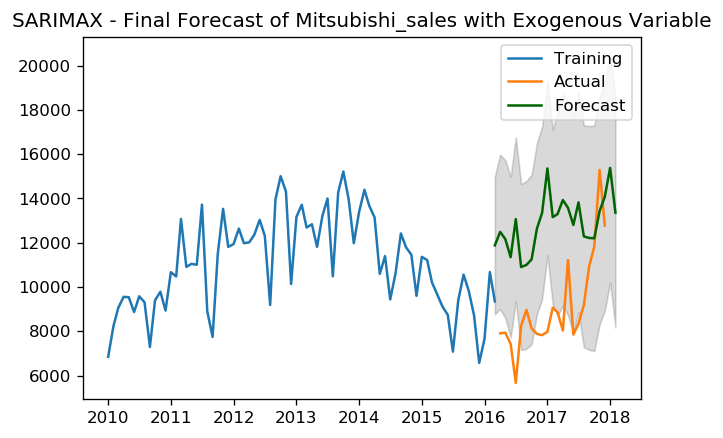

In [52]:
train = dfM[:75]
test = dfM[75:]
n_periods = 24

fitted, confint = smaxmodel.predict(n_periods=n_periods, 
                                  exogenous=np.tile(seasonal_index['Mitsubishi'], 2).reshape(-1,1), 
                                  return_conf_int=True)

index_of_fc = pd.date_range(train.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(train['Mitsubishi_sales_value_average'], label ='Training')
plt.plot(test['Mitsubishi_sales_value_average'], label = 'Actual')
plt.plot(fitted_series, color='darkgreen', label ='Forecast')
plt.legend()
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMAX - Final Forecast of Mitsubishi_sales with Exogenous Variable")
plt.show()

## Prophet

In [53]:
test = dfmitsubishi.copy()

In [54]:
test.drop('month', axis = 1, inplace = True)

In [55]:
test.reset_index(inplace=True)

In [56]:
prediction_size = 7
train_df = test[:-prediction_size]

In [57]:
from fbprophet import Prophet 
m = Prophet()

In [58]:
train_df.columns = ['ds','y']
train_df.head()

,ds,y
0,2010-01-01,6855.0
1,2010-02-01,8246.0
2,2010-03-01,9068.0
3,2010-04-01,9560.0
4,2010-05-01,9544.0


In [59]:
m.fit(train_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [60]:
future = m.make_future_dataframe(periods=prediction_size, freq='M')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-01,8916.132376,7557.715635,10564.255486,8916.132376,8916.132376,139.495284,139.495284,139.495284,139.495284,139.495284,139.495284,0.0,0.0,0.0,9055.627660
1,2010-02-01,9018.195802,8357.538660,11639.428639,9018.195802,9018.195802,1054.027847,1054.027847,1054.027847,1054.027847,1054.027847,1054.027847,0.0,0.0,0.0,10072.223649
2,2010-03-01,9110.382122,8410.062296,11665.995120,9110.382122,9110.382122,941.471988,941.471988,941.471988,941.471988,941.471988,941.471988,0.0,0.0,0.0,10051.854110
3,2010-04-01,9212.445548,7927.565817,11090.288654,9212.445548,9212.445548,274.012428,274.012428,274.012428,274.012428,274.012428,274.012428,0.0,0.0,0.0,9486.457977
4,2010-05-01,9311.216606,7886.249441,10961.469273,9311.216606,9311.216606,81.331639,81.331639,81.331639,81.331639,81.331639,81.331639,0.0,0.0,0.0,9392.548245


In [61]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-01-01,8916.132376,7557.715635,10564.255486,8916.132376,8916.132376,139.495284,139.495284,139.495284,139.495284,139.495284,139.495284,0.0,0.0,0.0,9055.627660
1,2010-02-01,9018.195802,8357.538660,11639.428639,9018.195802,9018.195802,1054.027847,1054.027847,1054.027847,1054.027847,1054.027847,1054.027847,0.0,0.0,0.0,10072.223649
2,2010-03-01,9110.382122,8410.062296,11665.995120,9110.382122,9110.382122,941.471988,941.471988,941.471988,941.471988,941.471988,941.471988,0.0,0.0,0.0,10051.854110
3,2010-04-01,9212.445548,7927.565817,11090.288654,9212.445548,9212.445548,274.012428,274.012428,274.012428,274.012428,274.012428,274.012428,0.0,0.0,0.0,9486.457977
4,2010-05-01,9311.216606,7886.249441,10961.469273,9311.216606,9311.216606,81.331639,81.331639,81.331639,81.331639,81.331639,81.331639,0.0,0.0,0.0,9392.548245
5,2010-06-01,9413.280031,7636.220107,10832.563409,9413.280031,9413.280031,-178.443881,-178.443881,-178.443881,-178.443881,-178.443881,-178.443881,0.0,0.0,0.0,9234.836150
6,2010-07-01,9512.051089,7818.298497,11050.014101,9512.051089,9512.051089,-195.706338,-195.706338,-195.706338,-195.706338,-195.706338,-195.706338,0.0,0.0,0.0,9316.344750
7,2010-08-01,9614.114515,7062.928393,10225.478166,9614.114515,9614.114515,-944.800770,-944.800770,-944.800770,-944.800770,-944.800770,-944.800770,0.0,0.0,0.0,8669.313745
8,2010-09-01,9716.177941,8068.936640,11063.388356,9716.177941,9716.177941,-78.461702,-78.461702,-78.461702,-78.461702,-78.461702,-78.461702,0.0,0.0,0.0,9637.716239
9,2010-10-01,9814.948999,9038.757815,12208.432994,9814.948999,9814.948999,925.134899,925.134899,925.134899,925.134899,925.134899,925.134899,0.0,0.0,0.0,10740.083898


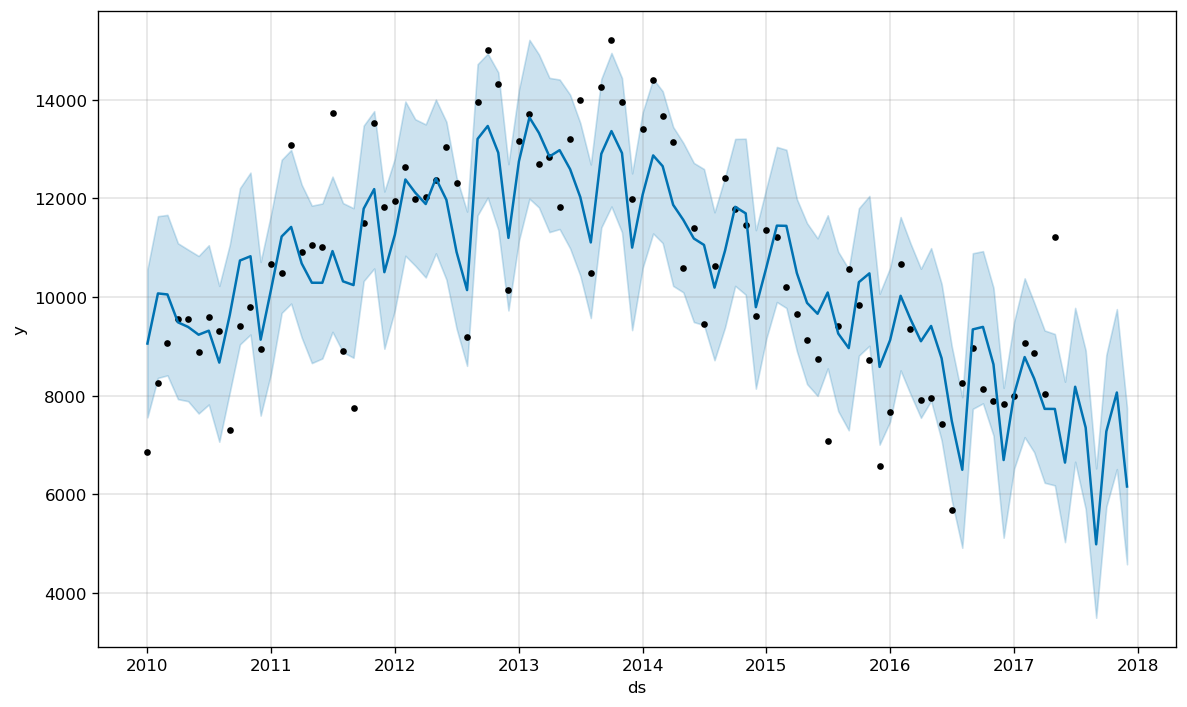

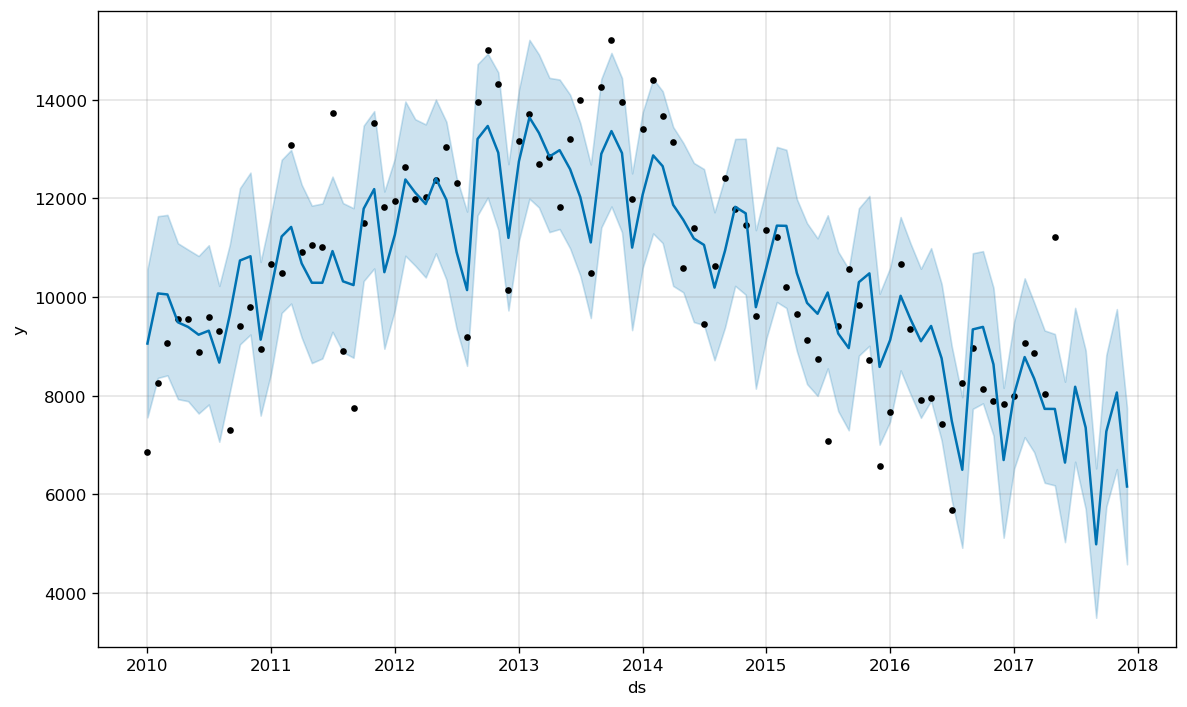

In [62]:
m.plot(forecast)

In [63]:
test.head()

,Periode,Mitsubishi
0,2010-01-01,6855.0
1,2010-02-01,8246.0
2,2010-03-01,9068.0
3,2010-04-01,9560.0
4,2010-05-01,9544.0


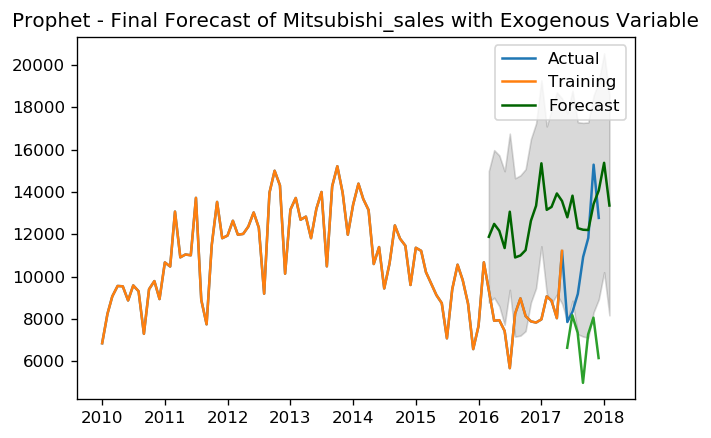

In [64]:
plt.plot(test['Periode'],test['Mitsubishi'], label = 'Actual')
plt.plot(train_df['ds'],train_df['y'], label ='Training')
plt.plot(forecast['ds'].iloc[-7:],forecast['yhat'].iloc[-7:])
plt.plot(fitted_series, color='darkgreen', label ='Forecast')

plt.legend()
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Prophet - Final Forecast of Mitsubishi_sales with Exogenous Variable")
plt.show()

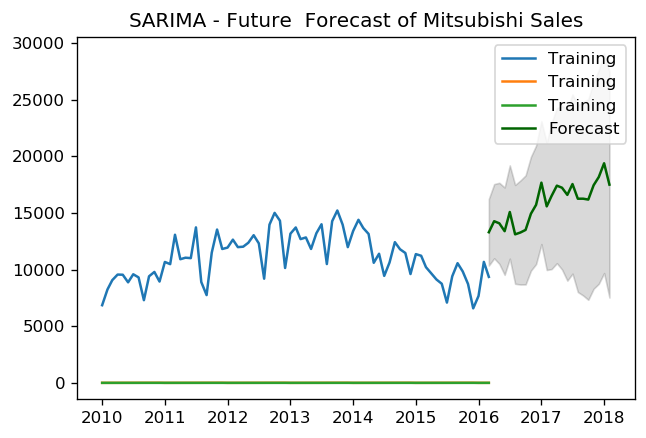

In [65]:
training=dfmitsubishi
n_periode=12

fitted, confint = model.predict(n_periods=n_periods, return_conf_int=True) #Return the Confidence Interval
index_of_fc = pd.date_range(train.index[-1], periods = n_periods, freq='MS')

fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

plt.plot(train, label ='Training')
plt.plot(fitted_series, color='darkgreen', label ='Forecast')
plt.legend()
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Future  Forecast of Mitsubishi Sales")
plt.show()

In [66]:
mitsubishi_predict=pd.DataFrame(fitted_series)
mitsubishi_predict.columns=['mitsubishi']

In [67]:
fitted_series

2016-03-01    13294.833804
2016-04-01    14269.376629
2016-05-01    14083.143453
2016-06-01    13389.532391
2016-07-01    15080.655937
2016-08-01    13109.305343
2016-09-01    13273.889581
2016-10-01    13501.508533
2016-11-01    14929.845536
2016-12-01    15712.634539
2017-01-01    17671.655528
2017-02-01    15579.340350
2017-03-01    16493.368591
2017-04-01    17408.150008
2017-05-01    17224.638357
2017-06-01    16592.989400
2017-07-01    17549.339355
2017-08-01    16254.476633
2017-09-01    16256.674598
2017-10-01    16179.006841
2017-11-01    17445.327273
2017-12-01    18167.493521
2018-01-01    19384.814795
2018-02-01    17496.051148
Freq: MS, dtype: float64

In [68]:
mitsubishi_predict.to_csv('mitsubishi_predict.csv')